In [2]:
import time
import random
import matplotlib.pyplot as plt
from data import *
from for_students import *

In [54]:
items, knapsack_max_capacity = get_big()
print(items)
print(knapsack_max_capacity)

               Name  Weight    Value
0               Axe   32252    68674
1       Bronze coin  225790   471010
2             Crown  468164   944620
3    Diamond statue  489494   962094
4      Emerald belt   35384    78344
5            Fossil  265590   579152
6         Gold coin  497911   902698
7            Helmet  800493  1686515
8               Ink  823576  1688691
9         Jewel box  552202  1056157
10            Knife  323618   677562
11       Long sword  382846   833132
12             Mask   44676    99192
13         Necklace  169738   376418
14       Opal badge  610876  1253986
15            Perls  854190  1853562
16           Quiver  671123  1320297
17        Ruby ring  698180  1301637
18  Silver bracelet  446517   859835
19        Timepiece  909620  1677534
20          Uniform  904818  1910501
21     Venom potion  730061  1528646
22       Wool scarf  931932  1827477
23        Cross bow  952360  2068204
24  Yesteryear book  926023  1746556
25         Zinc cup  978724  2100851
6

In [81]:
def roulette_wheel_selection(population, fitness):
    total_fitness = sum(fitness)
    relative_fitness = [f/total_fitness for f in fitness]
    return random.choices(population, weights=relative_fitness, k=2)

def crossover(parent1, parent2):
    crossover_point = len(parent1) // 2
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(child, mutation_rate):
    if random.random() < mutation_rate:
        index = random.randint(0, len(child) - 1)
        child[index] = not child[index]
    return child

def crossover_parents(parents):
    new_population = []
    for i in range(0, len(parents), 2):
        parent1 = parents[i]
        parent2 = parents[i+1]
        child1, child2 = crossover(parent1, parent2)
        new_population.append(child1)
        new_population.append(child2)

    return new_population

def mutate_population(population, mutation_rate):
    return [mutate(child, mutation_rate) for child in population]



Best solution: ['Axe', 'Helmet', 'Ink', 'Long sword', 'Mask', 'Necklace', 'Opal badge', 'Perls', 'Venom potion', 'Cross bow', 'Zinc cup']
Best solution value: 13557871
Time:  0.6008415222167969


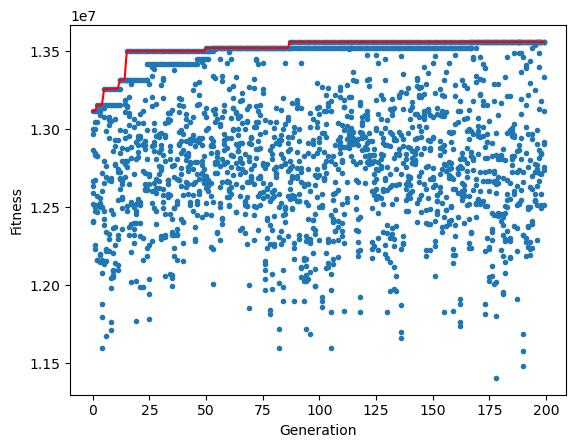

In [92]:
population_size = 100
generations = 200
n_elite = 2
n_selection = population_size - n_elite
mutation_rate = 1

start_time = time.time()
best_solution = None
best_fitness = 0
population_history = []
best_history = []
population = initial_population(len(items), population_size)
for _ in range(generations):
    population_history.append(population)

    new_population = []
    best_individual, best_individual_fitness = population_best(items, knapsack_max_capacity, population)

    fitnesses = [fitness(items, knapsack_max_capacity, individual) for individual in population]
    population_with_fitness = list(zip(population, fitnesses))
    population_with_fitness.sort(key=lambda x: x[1])

    elite_individuals = population_with_fitness[-n_elite:]
    new_population.extend([individual for individual, _ in elite_individuals])

    parent_candidates = population_with_fitness[-n_selection:]
    parents = [individual for individual, _ in parent_candidates]
    children = crossover_parents(parents)
    children = mutate_population(children, mutation_rate)
    new_population.extend(children)

    population = new_population

    if best_individual_fitness > best_fitness:
        best_solution = best_individual
        best_fitness = best_individual_fitness
    best_history.append(best_fitness)

end_time = time.time()
total_time = end_time - start_time
print('Best solution:', list(compress(items['Name'], best_solution)))
print('Best solution value:', best_fitness)
print('Time: ', total_time)

# plot generations
x = []
y = []
top_best = 10
for i, population in enumerate(population_history):
    plotted_individuals = min(len(population), top_best)
    x.extend([i] * plotted_individuals)
    population_fitnesses = [fitness(items, knapsack_max_capacity, individual) for individual in population]
    population_fitnesses.sort(reverse=True)
    y.extend(population_fitnesses[:plotted_individuals])
plt.scatter(x, y, marker='.')
plt.plot(best_history, 'r')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

In [38]:
last_population_fitnesses = [fitness(items, knapsack_max_capacity, individual) for individual in population_history[-1]]
print(last_population_fitnesses)

[13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 13008164, 0, 13008164, 13008164, 13008164, 13008164, 0, 13008164, 12939490, 13008164]
